# Pandas Extension - Wind Power By Country - Answers to Tasks 1-4

Scroll down to the tasks to see model answers.

## Grab Some Data from the Web
The next few code cells grab some data from the web (Wikipedia) and stores the contents of a particular table we want to analyze in a pandas dataframe.

In [1]:
# Import the requests library for making http requests.
import requests as r

# Create a header that says the request is coming form a browser-like agent (this is to prevent the website blocking our request).
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
}

# Make an http request to get the webpage with the following url.
url = "https://en.wikipedia.org/wiki/Wind_power_by_country"
page = r.get(url, headers = headers)

# Check that the request was successful. If so, the status code should be 200.
page.status_code

200

In [2]:
# Print the first few hundred characters of the webpage..
# The actual content of the page, which is HTML, is stored in the 'content' attribute of the page object.
print(page.content[0:200])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pin'


In [3]:
# Import the pandas and numpy libraries.
import pandas as pd, numpy as np

# Use pd.read_html() to find all the tables in the webpage and put them in a list.
tables = pd.read_html(page.content)

# There should be 13 tables in this web page. We want the fifth one (index == 4).
# We will store a copy of this table in a dataframe called wp (for wind power).
wp = tables[4].copy()
wp

,Country,Gen (TWh),% gen.,Cap. (GW),% cap. growth,Cap. fac.
0,World,2497.25,8.1,1132.84,11.1,25%
1,China,991.60,9.8,521.75,18.1,22%
2,United States,453.45,10.3,153.15,3.5,34%
3,Germany,133.44,28.0,72.82,4.8,21%
4,Brazil,107.81,14.5,32.96,13.2,37%
...,...,...,...,...,...,...
75,Belarus,0.19,0.4,0.12,0.0,18%
76,North Macedonia,0.19,3.3,0.07,0.0,31%
77,Switzerland,0.19,0.2,0.10,11.1,22%
78,Kosovo,0.12,1.8,0.14,0.0,10%


## Columns Explained

- Country: the name of the country
- Gen (TWh): the total energy generated by wind power in 2024 for that country, measured in Terawatt-hours.
- % gen.: the percentage of electricity generation that came from wind power in 2024, for that country.
- Cap. (GW): the total generating capacity for the country in 2024, measured in Gigawatts.
- % cap. growth: The growth in generating capacity for that country, measured as a percentage.
- Cap. fac.: Capacity factor. This says how much energy was generated in 2024 by wind as a percentage of the theorectical max (if it was really windy all the time!)

Some of these columns are not very clear, so we will  rename them below.

## Some Data Processing
Now that we've grabbed the data from a webpage and stored it in a dataframe called `wp`, we can start doing some data processing.

In [4]:
# Sort the rows on the "Gen (TWh)" column from largest to smallest.
wp.sort_values('Gen (TWh)', ascending=False, inplace=True)
wp

,Country,Gen (TWh),% gen.,Cap. (GW),% cap. growth,Cap. fac.
0,World,2497.25,8.1,1132.84,11.1,25%
1,China,991.60,9.8,521.75,18.1,22%
2,United States,453.45,10.3,153.15,3.5,34%
3,Germany,133.44,28.0,72.82,4.8,21%
4,Brazil,107.81,14.5,32.96,13.2,37%
...,...,...,...,...,...,...
75,Belarus,0.19,0.4,0.12,0.0,18%
76,North Macedonia,0.19,3.3,0.07,0.0,31%
77,Switzerland,0.19,0.2,0.10,11.1,22%
78,Kosovo,0.12,1.8,0.14,0.0,10%


In [5]:
# Delete the first row which is totals for the whole world.
wp.drop(0, inplace=True)

# Note: when we do the above, we can also reset the index to start at 0 and be consecutive integers. This makes future operations easier.
wp.reset_index(drop=True, inplace=True)

# drop the last column which we won't use.
wp.drop(columns = ['Cap. fac.'], inplace=True)
wp

,Country,Gen (TWh),% gen.,Cap. (GW),% cap. growth
0,China,991.60,9.8,521.75,18.1
1,United States,453.45,10.3,153.15,3.5
2,Germany,133.44,28.0,72.82,4.8
3,Brazil,107.81,14.5,32.96,13.2
4,United Kingdom,84.30,30.0,30.90,2.5
...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0
75,North Macedonia,0.19,3.3,0.07,0.0
76,Switzerland,0.19,0.2,0.10,11.1
77,Kosovo,0.12,1.8,0.14,0.0


In [6]:
# Rename some columns to make it more readable.
wp.rename(columns={"Gen (TWh)": "Generation 2024 (TWh)", "% gen.":"% of Total Generation 2024", 
                   "Cap. (GW)":"Capacity 2024 (GW)", "% cap. growth":"% Growth in Capacity"}, inplace='True')
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity
0,China,991.60,9.8,521.75,18.1
1,United States,453.45,10.3,153.15,3.5
2,Germany,133.44,28.0,72.82,4.8
3,Brazil,107.81,14.5,32.96,13.2
4,United Kingdom,84.30,30.0,30.90,2.5
...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0
75,North Macedonia,0.19,3.3,0.07,0.0
76,Switzerland,0.19,0.2,0.10,11.1
77,Kosovo,0.12,1.8,0.14,0.0


## Data Analysis

We will now do some analysis on the data. This will include makin projections for future generation and capacity based on the information available in the dataframe.

In [7]:
# Find the country where wind is the highest % of total generation.
max_pc = wp["% of Total Generation 2024"].max()
country_index = np.where(wp["% of Total Generation 2024"] == max_pc)[0][0]
country = wp.loc[country_index, 'Country']
print(f"{country} generates {max_pc:.1f}% of its electricity from wind power, more than any other country.")

Denmark generates 57.9% of its electricity from wind power, more than any other country.


<div style="background-color: #66CC00; padding: 10px;">

## Task 1

Copy and modify the code above to find the country with the greatest percentage growth in capacity.

</div>

In [16]:
# Model answer to Task 1

# Find the country with the greatest % growth in capacity
max_pc = wp["% Growth in Capacity"].max()
country_index = np.where(wp["% Growth in Capacity"] == max_pc)[0][0]
country = wp.loc[country_index, 'Country']
print(f"{country} has {max_pc:.1f}% growth in wind power capacity, more than any other country.")

Israel (2023) has 142.9% growth in wind power capacity, more than any other country.


In [9]:
# Work out each country's generation as a percentage of the global total.
total_gen = wp['Generation 2024 (TWh)'].sum()
wp['% of Global Generation 2024']=(wp['Generation 2024 (TWh)'] / total_gen)*100
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity,% of Global Generation 2024
0,China,991.60,9.8,521.75,18.1,39.795484
1,United States,453.45,10.3,153.15,3.5,18.198127
2,Germany,133.44,28.0,72.82,4.8,5.355294
3,Brazil,107.81,14.5,32.96,13.2,4.326695
4,United Kingdom,84.30,30.0,30.90,2.5,3.383178
...,...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0,0.007625
75,North Macedonia,0.19,3.3,0.07,0.0,0.007625
76,Switzerland,0.19,0.2,0.10,11.1,0.007625
77,Kosovo,0.12,1.8,0.14,0.0,0.004816


<div style="background-color: #66CC00; padding: 10px;">

## Task 2

Copy the code above and modify it to add a column called "% of Global Capacity" that gives each country's share of global wind power capacity.
</div>

In [18]:
# Model answer to Task 2

# Work out each country's capacity as a percentage of the global total.
total_gen = wp['Capacity 2024 (GW)'].sum()
wp['% of Global Capcity 2024']=(wp['Capacity 2024 (GW)'] / total_gen)*100
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity,% of Global Generation 2024,Projected Generation 2025 (TWh),% of Global Capcity 2024
0,China,991.60,9.8,521.75,18.1,39.795484,1171.07960,46.151329
1,United States,453.45,10.3,153.15,3.5,18.198127,469.32075,13.546863
2,Germany,133.44,28.0,72.82,4.8,5.355294,139.84512,6.441284
3,Brazil,107.81,14.5,32.96,13.2,4.326695,122.04092,2.915473
4,United Kingdom,84.30,30.0,30.90,2.5,3.383178,86.40750,2.733255
...,...,...,...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0,0.007625,0.19000,0.010615
75,North Macedonia,0.19,3.3,0.07,0.0,0.007625,0.19000,0.006192
76,Switzerland,0.19,0.2,0.10,11.1,0.007625,0.21109,0.008845
77,Kosovo,0.12,1.8,0.14,0.0,0.004816,0.12000,0.012384


In [11]:
# Project future generation based on current capacity and capacity growth.
# We will assume that future generation will grow in proportion to % capacity growth.
wp['Projected Generation 2025 (TWh)'] = wp['Generation 2024 (TWh)'] * (1 + wp['% Growth in Capacity']/100)
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity,% of Global Generation 2024,Projected Generation 2025 (TWh)
0,China,991.60,9.8,521.75,18.1,39.795484,1171.07960
1,United States,453.45,10.3,153.15,3.5,18.198127,469.32075
2,Germany,133.44,28.0,72.82,4.8,5.355294,139.84512
3,Brazil,107.81,14.5,32.96,13.2,4.326695,122.04092
4,United Kingdom,84.30,30.0,30.90,2.5,3.383178,86.40750
...,...,...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0,0.007625,0.19000
75,North Macedonia,0.19,3.3,0.07,0.0,0.007625,0.19000
76,Switzerland,0.19,0.2,0.10,11.1,0.007625,0.21109
77,Kosovo,0.12,1.8,0.14,0.0,0.004816,0.12000


<div style="background-color: #66CC00; padding: 10px;">

## Task 3

Copy the code above and modify it to add a column called "Projected Capacity 2025 (GW)" that gives a projection of each country's capacity, based on its current capacity and percentage growth in capacity.
</div>

In [19]:
# Type your code here

# Project future generation based on current capacity and capacity growth.
# We will assume that future generation will grow in proportion to % capacity growth.
wp['Projected Capacity 2025 (GW)'] = wp['Capacity 2024 (GW)'] * (1 + wp['% Growth in Capacity']/100)
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity,% of Global Generation 2024,Projected Generation 2025 (TWh),% of Global Capcity 2024,Projected Capacity 2025 (GW)
0,China,991.60,9.8,521.75,18.1,39.795484,1171.07960,46.151329,616.18675
1,United States,453.45,10.3,153.15,3.5,18.198127,469.32075,13.546863,158.51025
2,Germany,133.44,28.0,72.82,4.8,5.355294,139.84512,6.441284,76.31536
3,Brazil,107.81,14.5,32.96,13.2,4.326695,122.04092,2.915473,37.31072
4,United Kingdom,84.30,30.0,30.90,2.5,3.383178,86.40750,2.733255,31.67250
...,...,...,...,...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0,0.007625,0.19000,0.010615,0.12000
75,North Macedonia,0.19,3.3,0.07,0.0,0.007625,0.19000,0.006192,0.07000
76,Switzerland,0.19,0.2,0.10,11.1,0.007625,0.21109,0.008845,0.11110
77,Kosovo,0.12,1.8,0.14,0.0,0.004816,0.12000,0.012384,0.14000


## Using Matplotlib to Visual Our Work

We will import and use the `matplotlib.pyplot` library to create some visualizations of our data. 

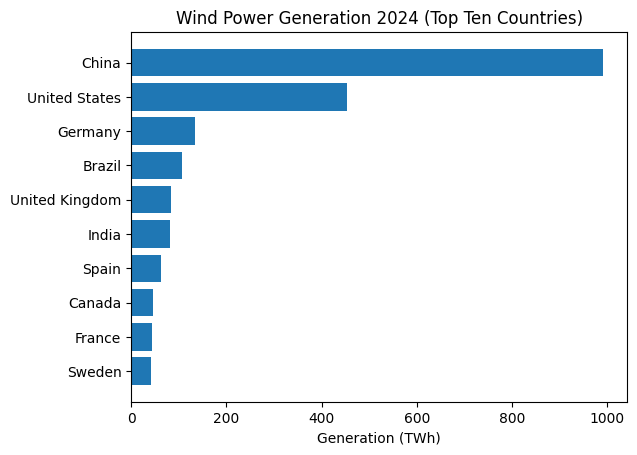

In [13]:
# Import the relevant plotting library.
import matplotlib.pyplot as plt

# Create a bar graph showing generation for the top ten countries.
x = wp['Country'][0:10].tolist()
y = wp['Generation 2024 (TWh)'][0:10].tolist()

x = x[::-1]
y = y[::-1]
plt.barh(x, y)
plt.title("Wind Power Generation 2024 (Top Ten Countries)")
plt.xlabel("Generation (TWh)")
plt.show()

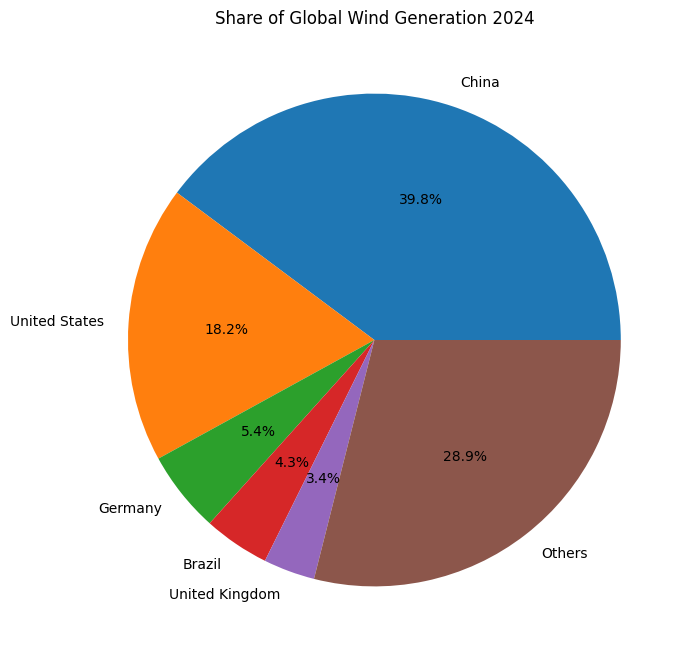

In [14]:
# Create a pie chart showing share of global generation for 2024.

countries = wp['Country'][0:5].tolist()
data = wp['% of Global Generation 2024'][0:5].tolist()
countries.append("Others")
data.append(100-sum(data))
plt.figure(figsize=(10, 8))
plt.title("Share of Global Wind Generation 2024")
plt.pie(data, labels=countries, autopct='%1.1f%%')
plt.show()

<div style="background-color: #66CC00; padding: 10px;">

## Task 4

1. Use the data to create a bar chart similar to that above, but which shows the projected generation for 2025 for the top 10 countries.
2. Use the data to create a pie chart similar to that above, but which shows the projected share of global generation for 2025.
</div>

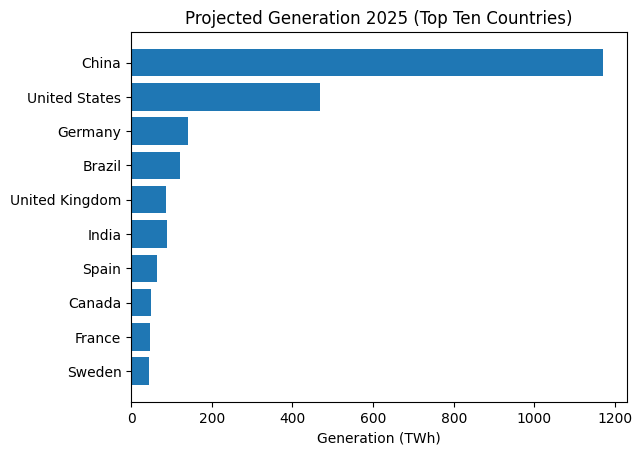

In [20]:
# Model Answer to Task 4 Part 1

# Create a bar graph showing projected generation for the top ten countries.
x = wp['Country'][0:10].tolist()
y = wp['Projected Generation 2025 (TWh)'][0:10].tolist()

x = x[::-1]
y = y[::-1]
plt.barh(x, y)
plt.title("Projected Generation 2025 (Top Ten Countries)")
plt.xlabel("Generation (TWh)")
plt.show()


In [22]:
# Model Answer to Task 4 Part 2

# Create a pie chart showing projected share of global generation for 2025.

# First we have to workout projected share for each country.

global_proj_gen = wp['Projected Generation 2025 (TWh)'].sum()
wp['% of Global Generation 2025'] = 100*wp['Projected Generation 2025 (TWh)'] / global_proj_gen
wp

,Country,Generation 2024 (TWh),% of Total Generation 2024,Capacity 2024 (GW),% Growth in Capacity,% of Global Generation 2024,Projected Generation 2025 (TWh),% of Global Capcity 2024,Projected Capacity 2025 (GW),% of Global Generation 2025
0,China,991.60,9.8,521.75,18.1,39.795484,1171.07960,46.151329,616.18675,42.324902
1,United States,453.45,10.3,153.15,3.5,18.198127,469.32075,13.546863,158.51025,16.962087
2,Germany,133.44,28.0,72.82,4.8,5.355294,139.84512,6.441284,76.31536,5.054252
3,Brazil,107.81,14.5,32.96,13.2,4.326695,122.04092,2.915473,37.31072,4.410776
4,United Kingdom,84.30,30.0,30.90,2.5,3.383178,86.40750,2.733255,31.67250,3.122921
...,...,...,...,...,...,...,...,...,...,...
74,Belarus,0.19,0.4,0.12,0.0,0.007625,0.19000,0.010615,0.12000,0.006867
75,North Macedonia,0.19,3.3,0.07,0.0,0.007625,0.19000,0.006192,0.07000,0.006867
76,Switzerland,0.19,0.2,0.10,11.1,0.007625,0.21109,0.008845,0.11110,0.007629
77,Kosovo,0.12,1.8,0.14,0.0,0.004816,0.12000,0.012384,0.14000,0.004337


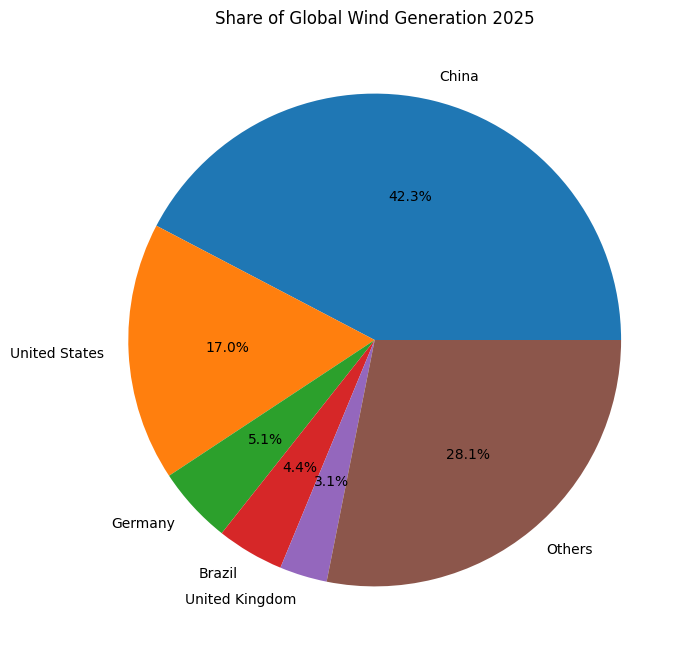

In [23]:
# Now create the pie chart

countries = wp['Country'][0:5].tolist()
data = wp['% of Global Generation 2025'][0:5].tolist()
countries.append("Others")
data.append(100-sum(data))
plt.figure(figsize=(10, 8))
plt.title("Share of Global Wind Generation 2025")
plt.pie(data, labels=countries, autopct='%1.1f%%')
plt.show()